# Financial Time Series Analysis
# 2 Exploratory analysis and volatility

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import laplace, norm
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
import math

In [2]:
data = pd.read_csv('../data/financial_data.csv', index_col=0, parse_dates=True)
data.head()

,Close_ACS.MC,Close_ACX.MC,Close_AENA.MC,Close_AMS.MC,Close_ANA.MC,Close_BBVA.MC,Close_BKT.MC,Close_CABK.MC,Close_CLNX.MC,Close_COL.MC,...,Volume_MTS.MC,Volume_NTGY.MC,Volume_RED.MC,Volume_REP.MC,Volume_ROVI.MC,Volume_SAB.MC,Volume_SAN.MC,Volume_SCYR.MC,Volume_SLR.MC,Volume_TEF.MC
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-11,16.940954,7.970278,87.309105,35.313820,49.856819,5.248390,2.825591,2.654470,11.113304,4.587702,...,264489,1122420,5608440,5718597,8943,26396456,67946568,10477838,221773,25738355
2015-05-12,16.728851,7.926048,87.556168,35.695267,49.732063,5.219527,2.861327,2.655066,11.187392,4.580409,...,800373,2414239,5672096,7923122,14322,36956820,74136179,8688260,211602,127886879
2015-05-13,16.633675,8.156045,88.109573,35.461197,49.621155,5.214910,2.900386,2.644336,11.483748,4.624170,...,572064,1527136,2489748,9626474,9754,32088105,58436689,8717111,73722,90652907
2015-05-14,16.995337,8.285788,92.655380,35.331158,50.057831,5.287066,2.926564,2.668777,11.706013,4.602290,...,2017243,1273382,2958900,5289364,8238,35337405,33497163,6514814,62359,69659502
2015-05-15,16.573854,8.285788,93.189011,35.491539,49.738991,5.236268,2.894154,2.635990,11.409658,4.631464,...,1137415,1477460,2967068,10968719,4615,21808416,72000982,4285704,1070468,70445819


## 2.1. Initial Visualization

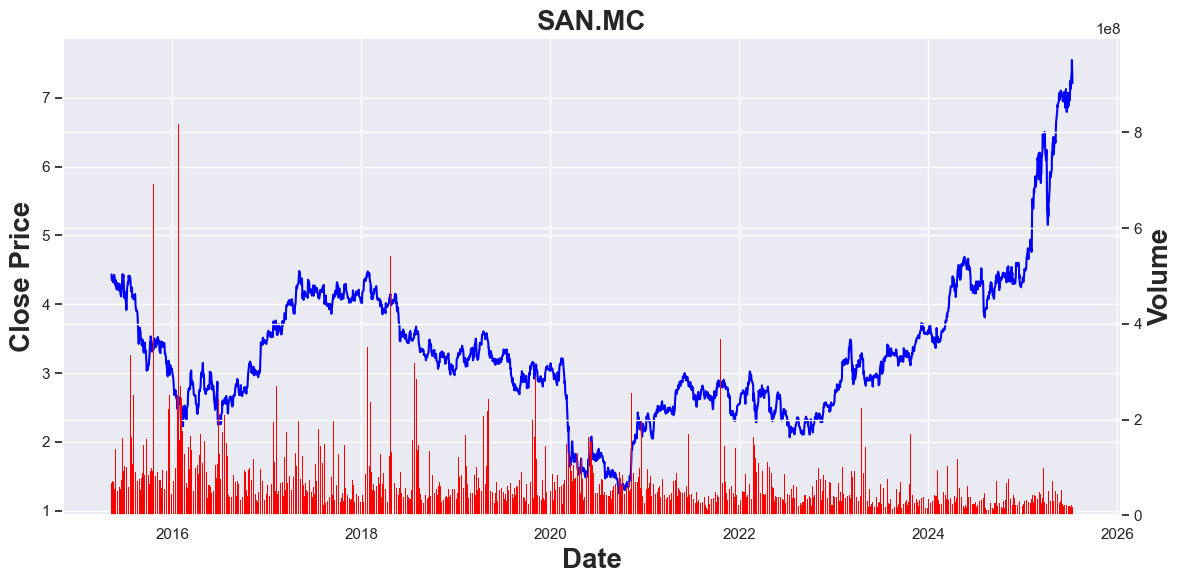

In [3]:
def Visual(data,  asset_name):
    sns.set(style="darkgrid")

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Price
    sns.lineplot(data=data, x=data.index,y=f"Close_{asset_name}", ax=ax1, color='blue')
    ax1.set_xlabel("Date", fontsize=20, fontweight='bold')
    ax1.set_ylabel("Close Price", fontsize=20, fontweight='bold')
    ax1.tick_params(axis='y')

    # Volume
    volume_col = f"Volume_{asset_name}"
    if volume_col in data.columns:
        ax2 = ax1.twinx()
        ax2.bar( data.index, data[volume_col], color='red', edgecolor='black', linewidth=0, width=1   )

        ax2.set_ylabel("Volume", fontsize=20, fontweight='bold')
        ax2.tick_params(axis='y')


    plt.title(asset_name, fontsize=20, fontweight='bold')
    plt.tight_layout()

    plt.show()

Visual(data,  "SAN.MC")

## 2.2. Returns

In [4]:
close_cols = [col for col in data.columns if col.startswith("Close_")]
returns = np.log(data[close_cols] / data[close_cols].shift(1))
returns = returns.dropna()
returns.to_csv('../data/log_returns.csv')
returns.describe()

,Close_ACS.MC,Close_ACX.MC,Close_AENA.MC,Close_AMS.MC,Close_ANA.MC,Close_BBVA.MC,Close_BKT.MC,Close_CABK.MC,Close_CLNX.MC,Close_COL.MC,...,Close_MTS.MC,Close_NTGY.MC,Close_RED.MC,Close_REP.MC,Close_ROVI.MC,Close_SAB.MC,Close_SAN.MC,Close_SCYR.MC,Close_SLR.MC,Close_TEF.MC
count,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,...,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000
mean,0.000462,0.000128,-0.000506,0.000272,0.000435,0.000346,0.000533,0.000398,0.000409,0.000094,...,0.000196,0.000314,0.000189,0.000128,0.000552,0.000259,0.000187,0.000127,0.000901,-0.000152
std,0.019194,0.019737,0.048280,0.018555,0.017947,0.021385,0.019352,0.021396,0.017588,0.017654,...,0.028261,0.015084,0.012033,0.019855,0.019702,0.026707,0.021598,0.022194,0.032531,0.016413
min,-0.209149,-0.154335,-2.306767,-0.175553,-0.192247,-0.176490,-0.171350,-0.200009,-0.108365,-0.169864,...,-0.200695,-0.182553,-0.143584,-0.163991,-0.177807,-0.214337,-0.221724,-0.230378,-0.327714,-0.175791
25%,-0.008135,-0.010630,-0.006888,-0.007851,-0.008405,-0.009732,-0.009001,-0.011090,-0.009150,-0.008436,...,-0.014354,-0.006310,-0.006118,-0.009463,-0.009187,-0.011803,-0.011002,-0.009808,-0.016022,-0.008195
50%,0.001030,0.000000,0.000762,0.000653,0.000904,0.000777,0.000662,0.000533,0.000000,0.000609,...,0.000000,0.000762,0.000282,0.000292,0.000000,0.000537,0.000452,0.000652,0.000000,0.000000
75%,0.009055,0.010732,0.008801,0.009199,0.010011,0.011167,0.010309,0.011803,0.010190,0.009348,...,0.014791,0.007642,0.006738,0.010136,0.011268,0.013603,0.011475,0.011322,0.016860,0.008145
max,0.229891,0.125964,0.179468,0.139790,0.138894,0.154036,0.181503,0.139573,0.115369,0.179011,...,0.167919,0.143950,0.068866,0.167427,0.096460,0.219867,0.175818,0.125206,0.189180,0.163842


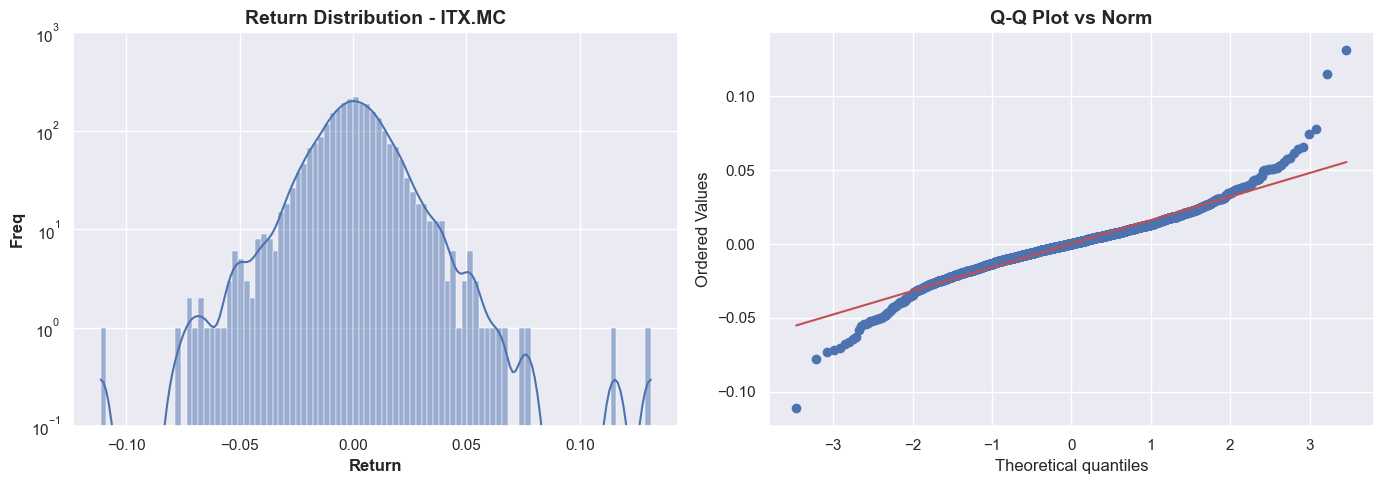

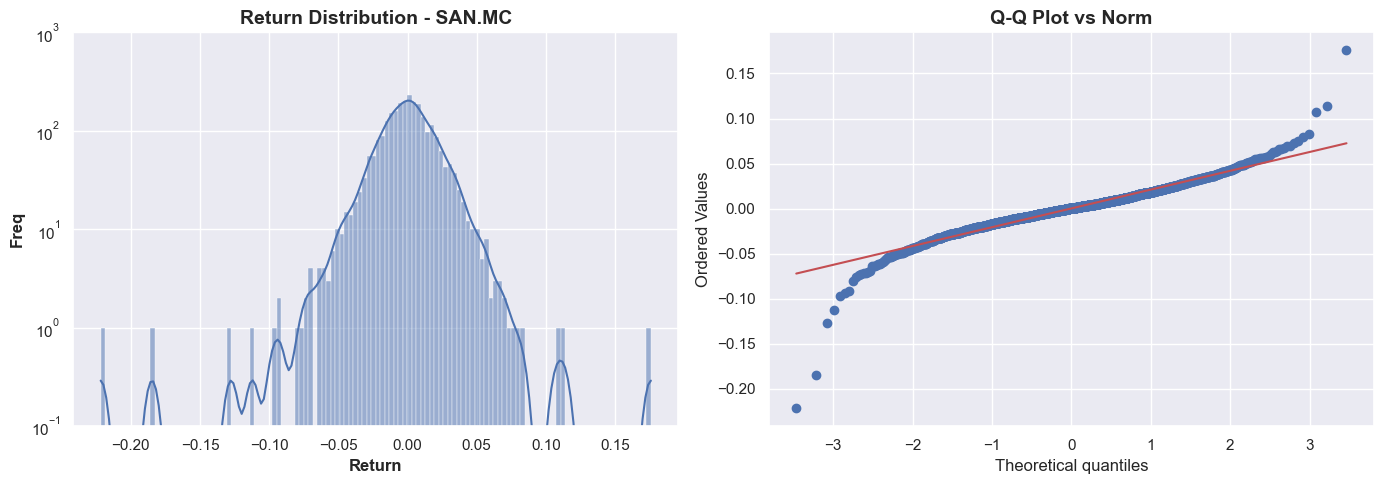

In [5]:
def return_dist_and_qq(data, asset, dist='norm'):
    column_name = f"Close_{asset}"
    
    if column_name not in data.columns:
        raise ValueError(f"La columna '{column_name}' no existe en el DataFrame.")
    

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(returns[column_name], kde=True, ax=axes[0])
    axes[0].set_yscale("log")
    axes[0].set_xlabel("Return", fontsize=12, fontweight='bold')
    axes[0].set_ylabel("Freq", fontsize=12, fontweight='bold')
    axes[0].set_title(f"Return Distribution - {asset}", fontsize=14, fontweight='bold')
    axes[0].set_ylim(0.1, 1000)
    

    stats.probplot(returns[column_name].dropna(), dist=dist, plot=axes[1])
    axes[1].set_title(f"Q-Q Plot vs {dist.capitalize()}", fontsize=14, fontweight='bold')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

return_dist_and_qq(returns, "ITX.MC")
return_dist_and_qq(returns, "SAN.MC")

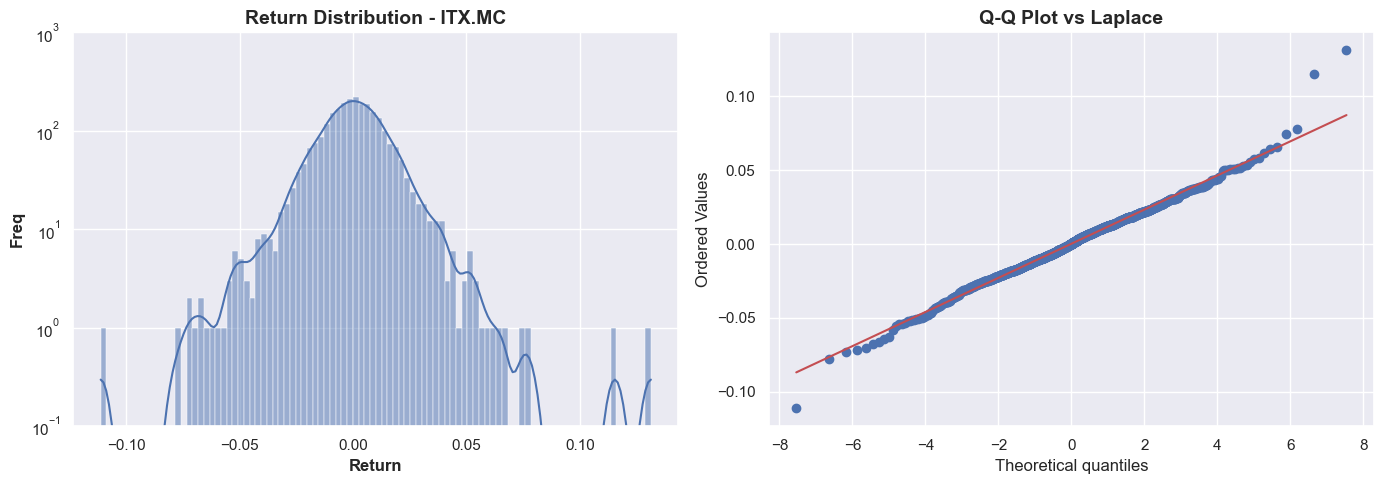

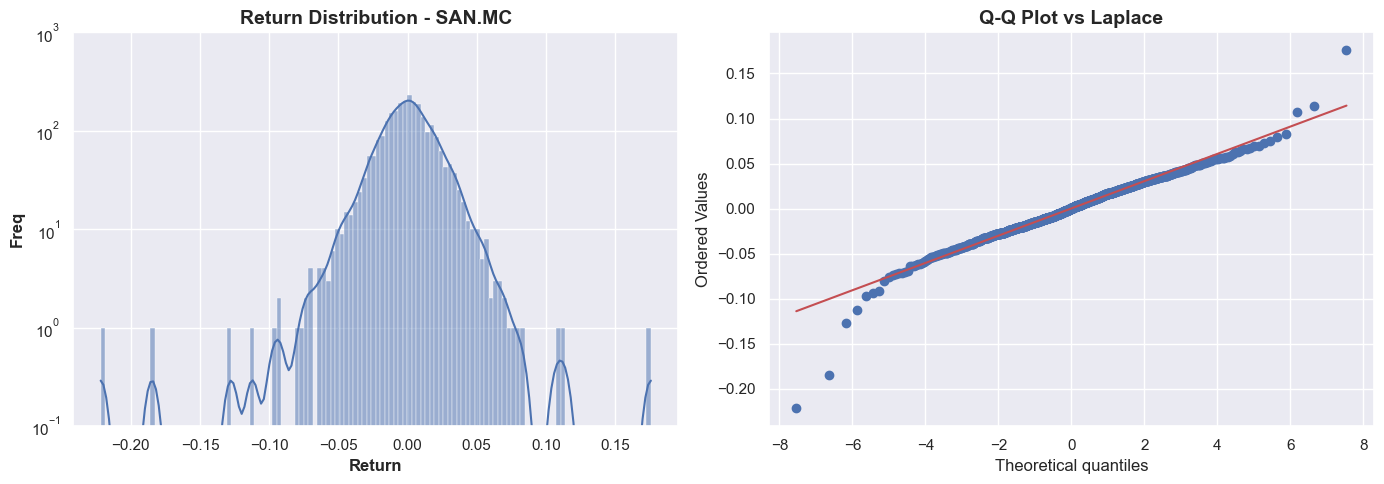

In [6]:
return_dist_and_qq(returns, "ITX.MC", "laplace")
return_dist_and_qq(returns, "SAN.MC", "laplace")

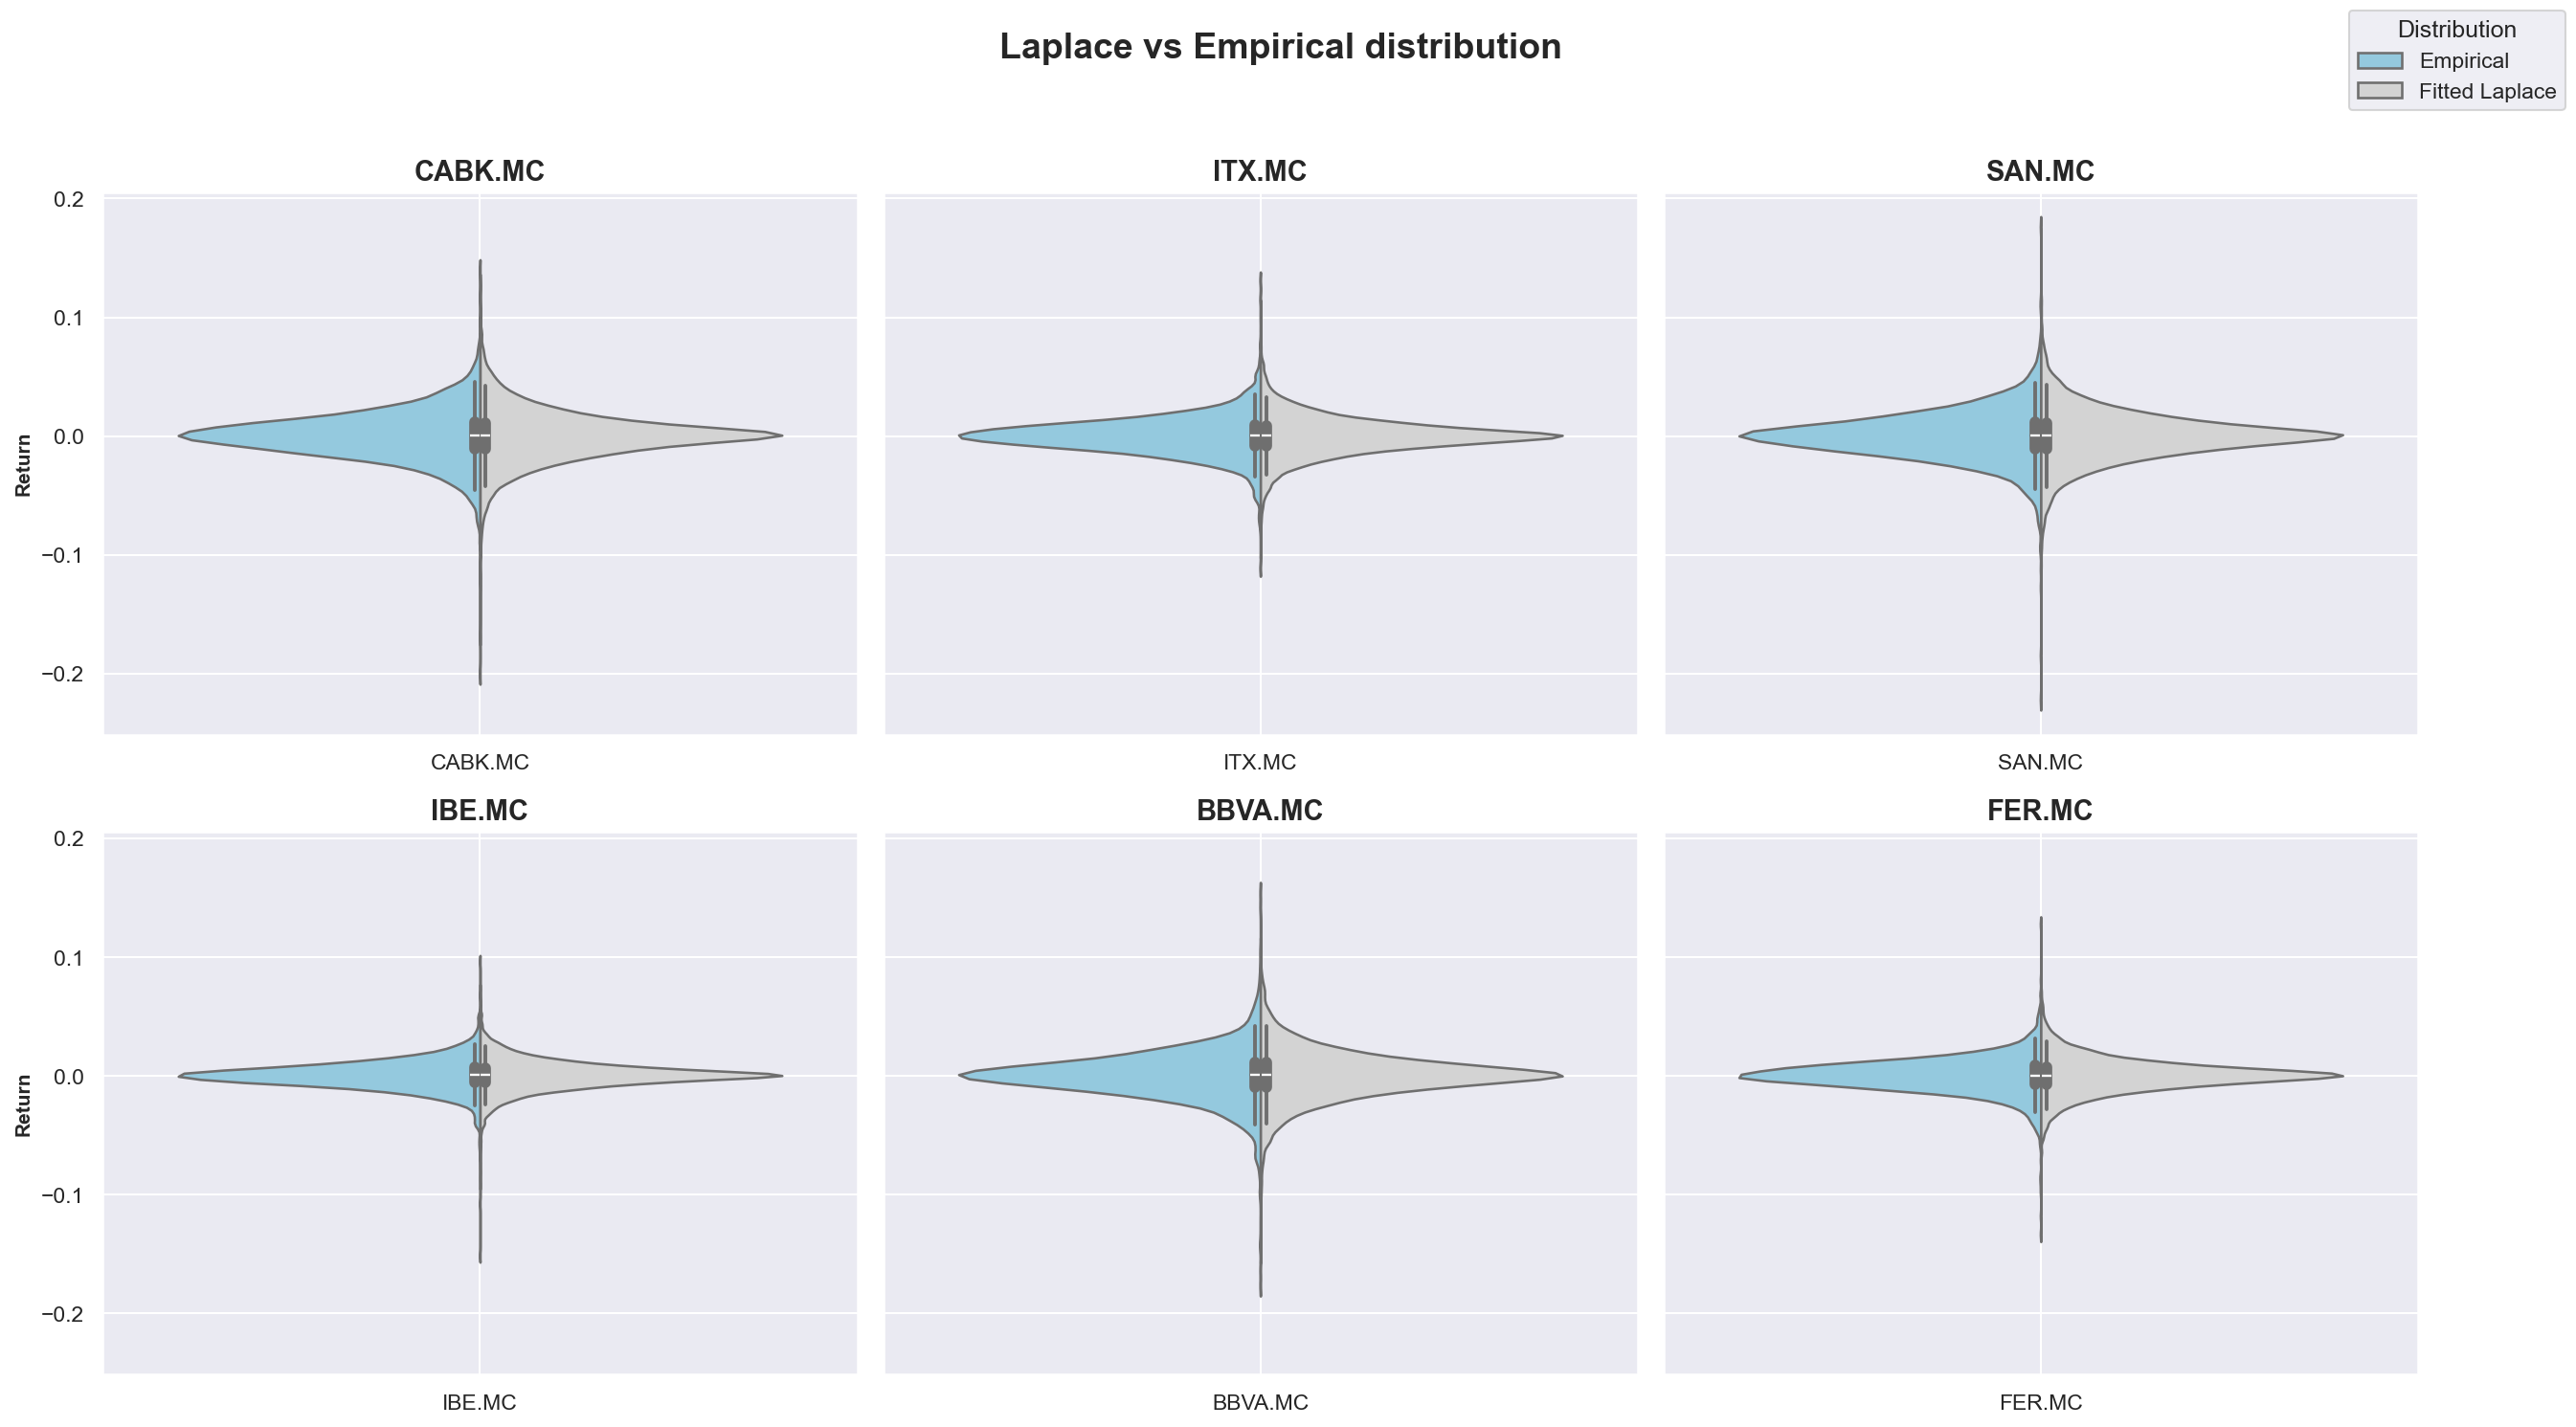

In [7]:
def plot_split_violins(data, assets, n_samples=10000):

    all_data = []
    for asset in assets:
        column = f"Close_{asset}"
        if column not in data.columns:
            raise ValueError(f"{column} not found in DataFrame.")

        empirical = data[column].dropna()
        mu, sigma = laplace.fit(empirical)
        synthetic = np.random.laplace(loc=mu, scale=sigma, size=n_samples)

        df_violin = pd.DataFrame({
            'Return': np.concatenate([empirical, synthetic]),
            'Source': ['Empirical'] * len(empirical) + ['Fitted Laplace'] * len(synthetic),
            'Asset': asset
        })
        all_data.append(df_violin)

    df_all = pd.concat(all_data, ignore_index=True)

    rows = 2
    cols = 3
    fig, axes = plt.subplots(rows, cols, figsize=(18, 10), dpi=150, sharey=True)
    axes = axes.flatten()

    for i, asset in enumerate(assets):
        sns.violinplot(
            data=df_all[df_all["Asset"] == asset],
            x="Asset", y="Return", hue="Source", split=True,
            palette={"Empirical": "skyblue", "Fitted Laplace": "lightgray"},
            ax=axes[i]
        )
        axes[i].set_title(asset, fontsize=14, fontweight='bold')
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Return" if i % cols == 0 else "", fontsize=10, fontweight='bold')
        axes[i].grid(True)
        axes[i].get_legend().remove()

    for j in range(len(assets), len(axes)):
        fig.delaxes(axes[j])

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Distribution", loc="upper right")
    fig.suptitle("Laplace vs Empirical distribution", fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    plt.show()
    
plot_split_violins(returns, assets=["CABK.MC", "ITX.MC", "SAN.MC", "IBE.MC", "BBVA.MC", "FER.MC"])

### 2.2.1. Hypothesis test

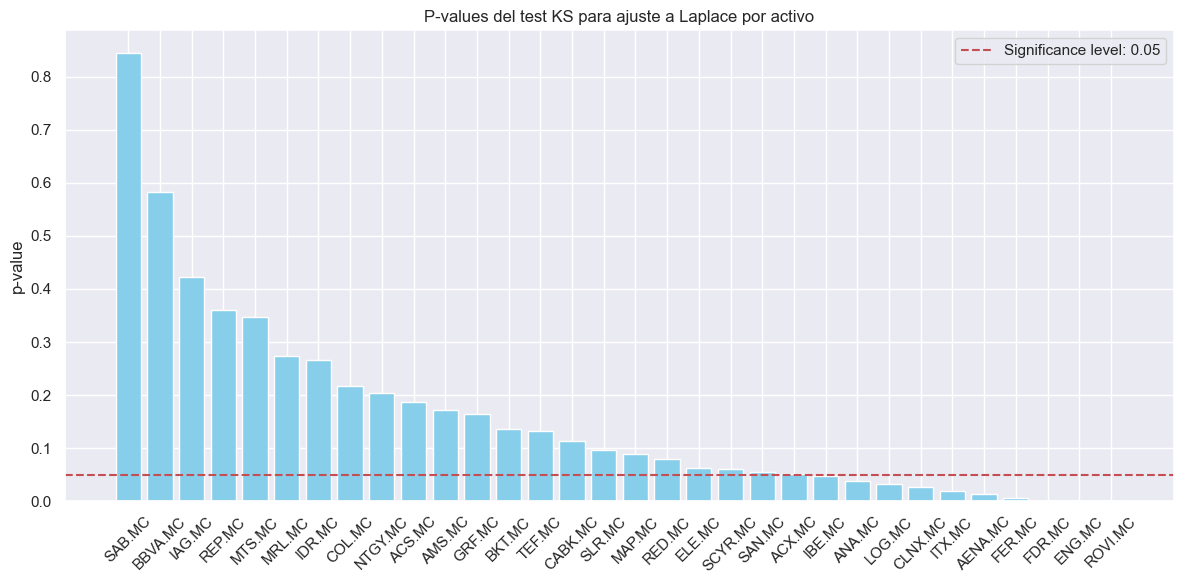

In [8]:
def bootstrap_laplace_errors(data, n_boot=500, random_state=None):
    rng = np.random.default_rng(random_state)
    locs = []
    scales = []
    n = len(data)

    for _ in range(n_boot):
        sample = rng.choice(data, size=n, replace=True)
        loc, scale = laplace.fit(sample)
        locs.append(loc)
        scales.append(scale)

    loc_std = np.std(locs, ddof=1)
    scale_std = np.std(scales, ddof=1)
    return loc_std, scale_std

results = []

for col in returns.columns:
    returns_data = returns[col].dropna()
    loc, scale = laplace.fit(returns_data)
    ks_stat, p_value = stats.kstest(returns_data, "laplace", args=(loc, scale))

    # Bootstrap standard errors
    se_loc, se_scale = bootstrap_laplace_errors(returns_data, n_boot=500)

    results.append({
        'Asset': col.replace("Close_", ""),
        'loc': loc,
        'scale': scale,
        'se_loc': se_loc,
        'se_scale': se_scale,
        'p_value': p_value,
        'ks_stat': ks_stat
    })

results = pd.DataFrame(results)
results = results.sort_values(by='p_value', ascending=False)

results.to_csv('../data/returns_fit.csv', index=False)

plt.figure(figsize=(12, 6))
plt.bar(results['Asset'], results['p_value'], color='skyblue')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance level: 0.05')
plt.xticks(rotation=45)
plt.ylabel('p-value')
plt.title('P-values del test KS para ajuste a Laplace por activo')
plt.legend()
plt.tight_layout()
plt.show()

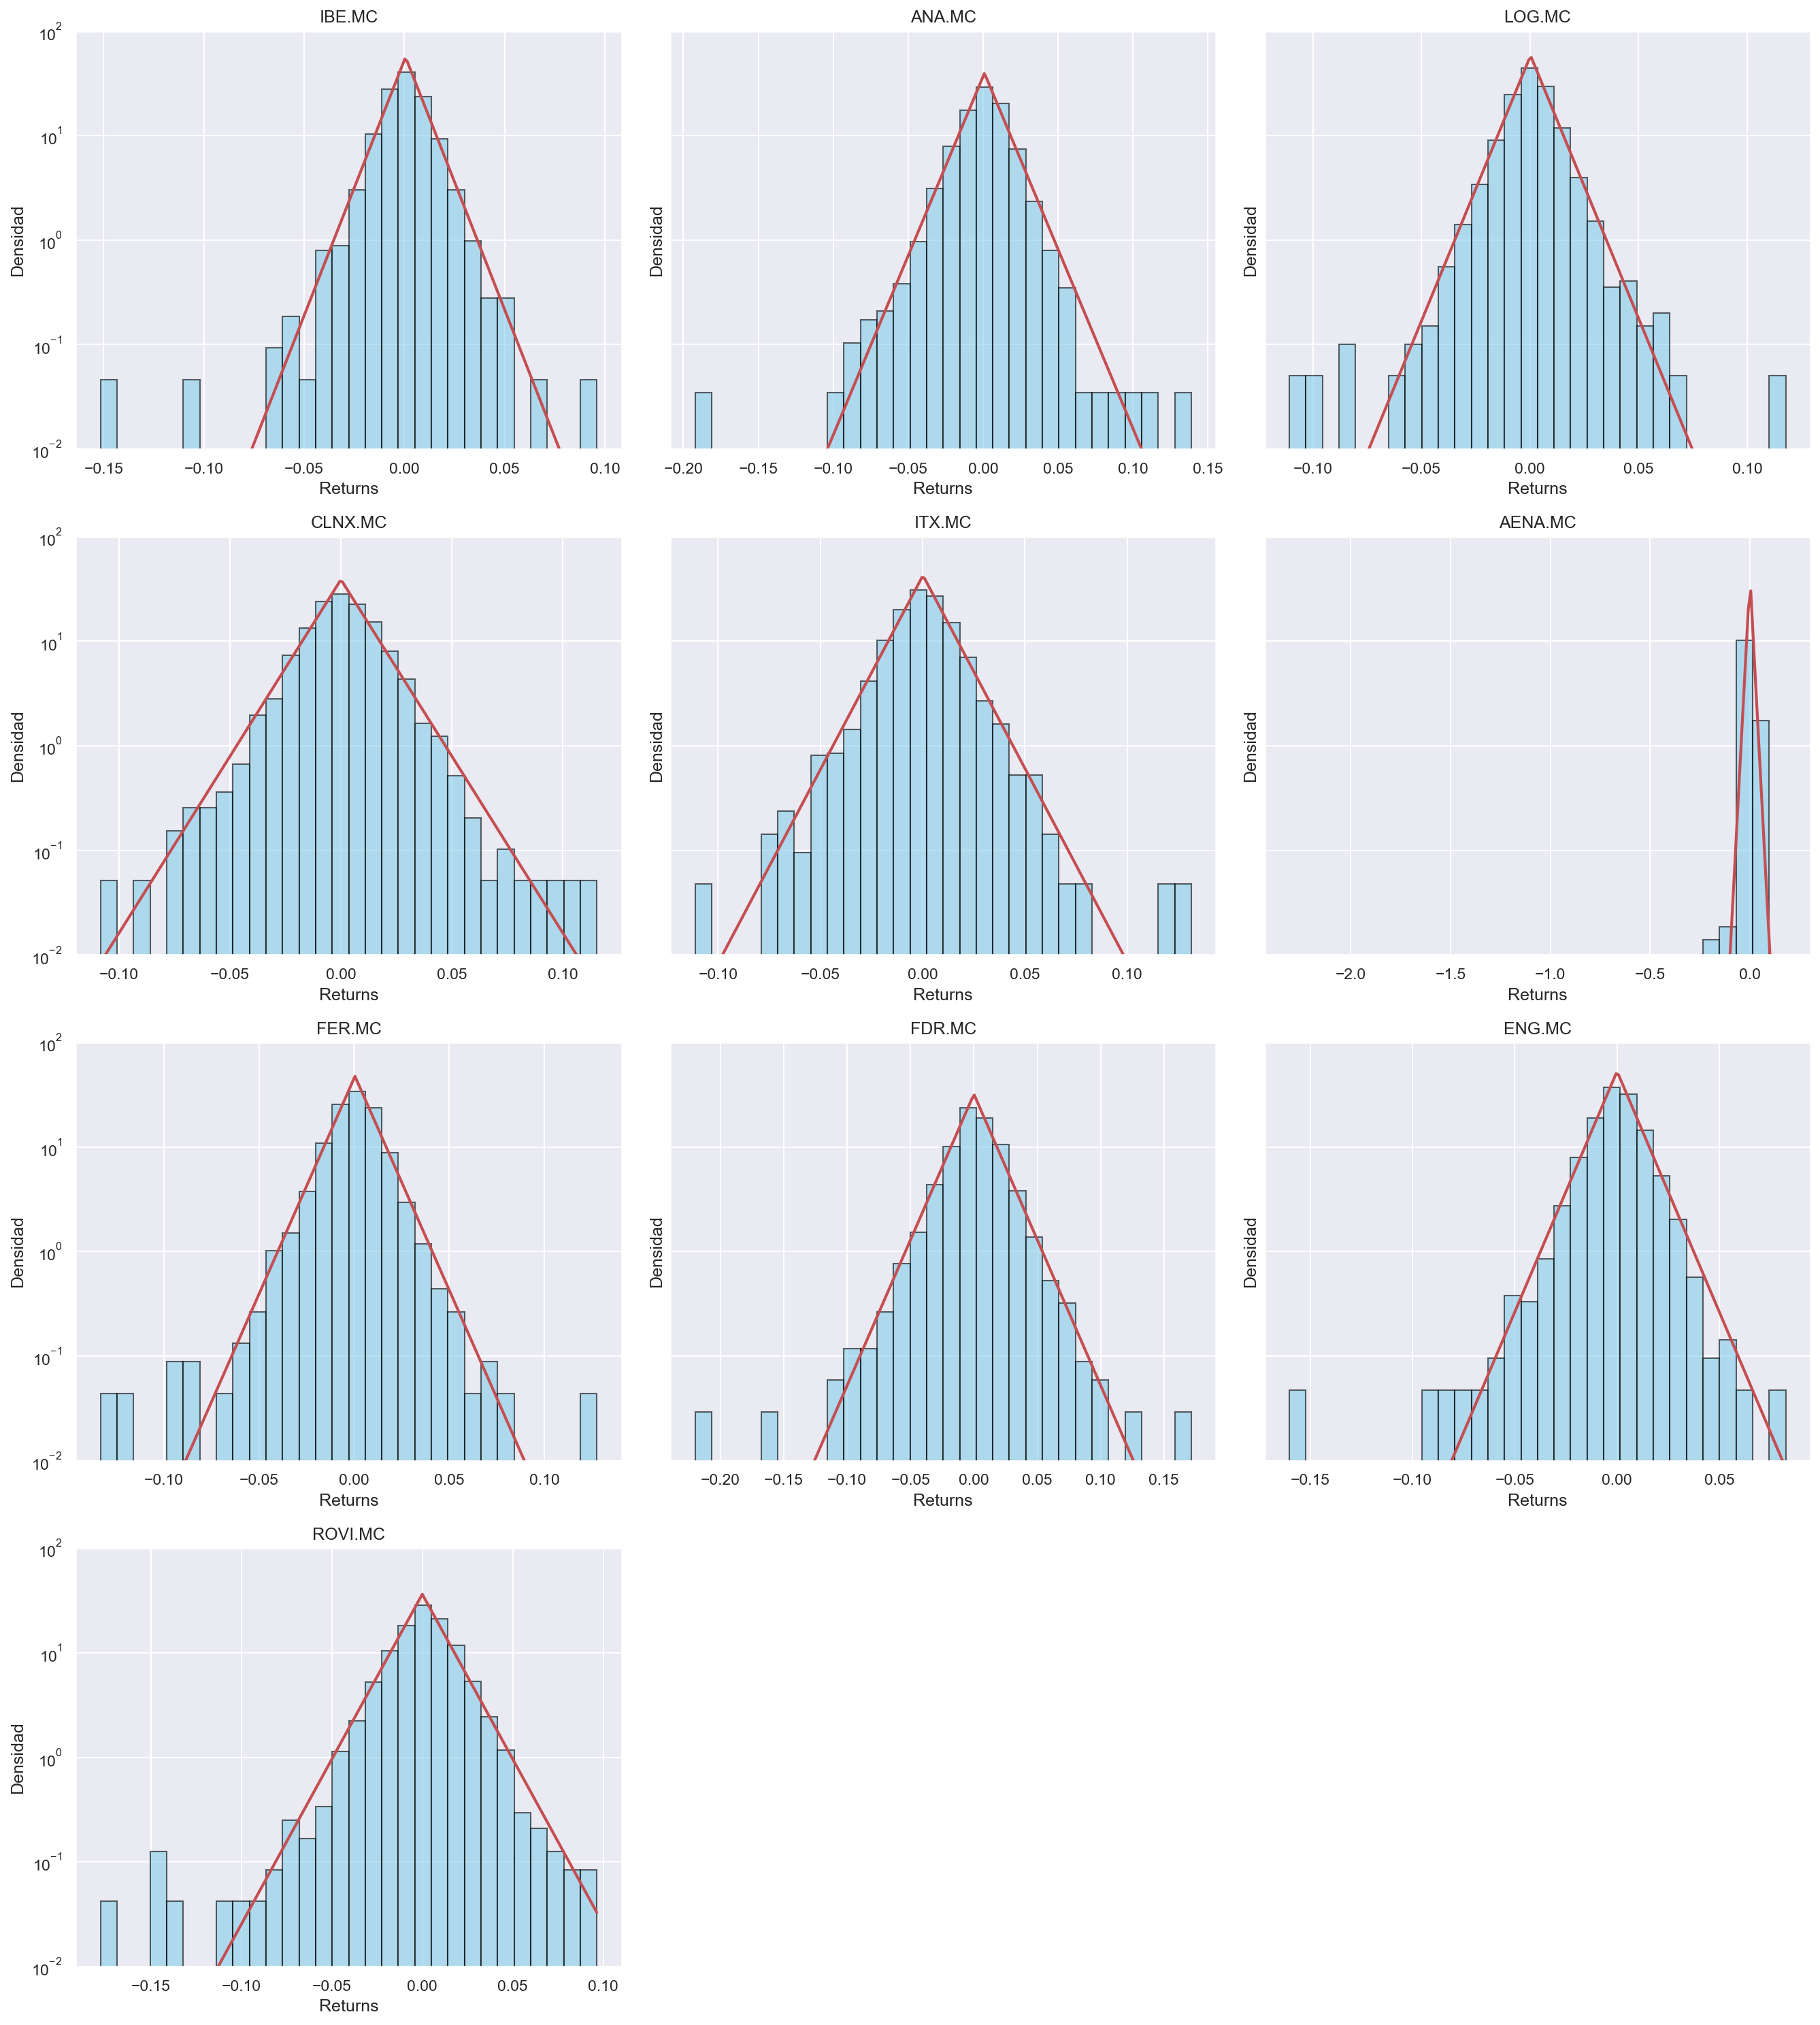

In [9]:
assets_rechazados = results[results['p_value'] < 0.05]['Asset']

assets = list(assets_rechazados)
cols = 3
rows = math.ceil(len(assets) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows), dpi=150, sharey=True)
axes = axes.flatten()

for i, asset in enumerate(assets):
    ax = axes[i]
    asset_return = returns[f"Close_{asset}"].dropna()

    ax.hist(asset_return, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.6)

    fit_params = results[results['Asset'] == asset].iloc[0]
    loc = fit_params['loc']
    scale = fit_params['scale']

   
    x = np.linspace(asset_return.min(), asset_return.max(), 200)
    y = laplace.pdf(x, loc, scale)
    ax.plot(x, y, 'r-', lw=2)
    ax.set_yscale("log")
    ax.set_ylim(1e-2, 1e2)
    ax.set_title(f"{asset}")
    ax.set_xlabel('Returns')
    ax.set_ylabel('Densidad')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 2.3 Volatiliy

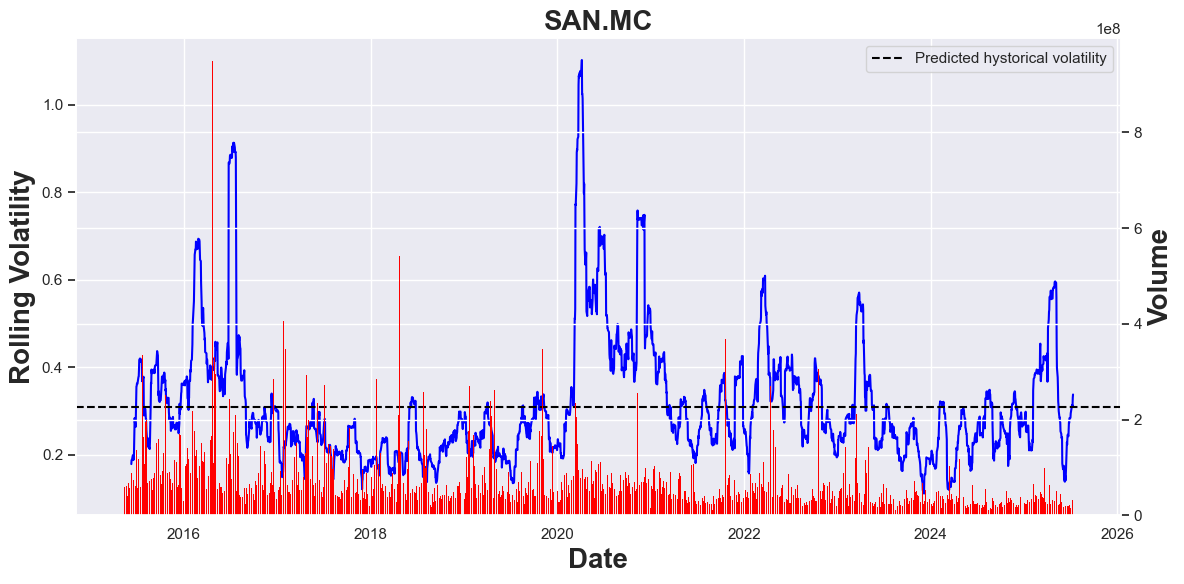

In [10]:
def Rolling_Vol(data, data2, results, asset_name):
    sns.set(style="darkgrid")
    rolling_vol = data[f"Close_{asset_name}"].rolling(window=21).std() * np.sqrt(252)
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    fit_params = results[results['Asset'] == asset].iloc[0]
    loc = fit_params['loc']
    scale = fit_params['scale']
    
    pred_vol = np.sqrt(2)*scale* np.sqrt(252)
    
    # Price
    sns.lineplot(data=data, x=data.index,y=rolling_vol, ax=ax1, color='blue')
    ax1.set_xlabel("Date", fontsize=20, fontweight='bold')
    ax1.set_ylabel("Rolling Volatility", fontsize=20, fontweight='bold')
    
    ax1.axhline(y=pred_vol, color='black', linestyle='--', label='Predicted hystorical volatility')
    ax1.legend()
    ax1.tick_params(axis='y')

    # Volume
    volume_col = f"Volume_{asset_name}"
    
    if volume_col in data2.columns:
        ax2 = ax1.twinx()
        ax2.bar( data2.index, data2[volume_col], color='red', edgecolor='black', linewidth=0, width=1   )

        ax2.set_ylabel("Volume", fontsize=20, fontweight='bold')
        ax2.tick_params(axis='y')


    plt.title(asset_name, fontsize=20, fontweight='bold')
    plt.tight_layout()

    plt.show()
    
Rolling_Vol(returns, data, results, "SAN.MC")

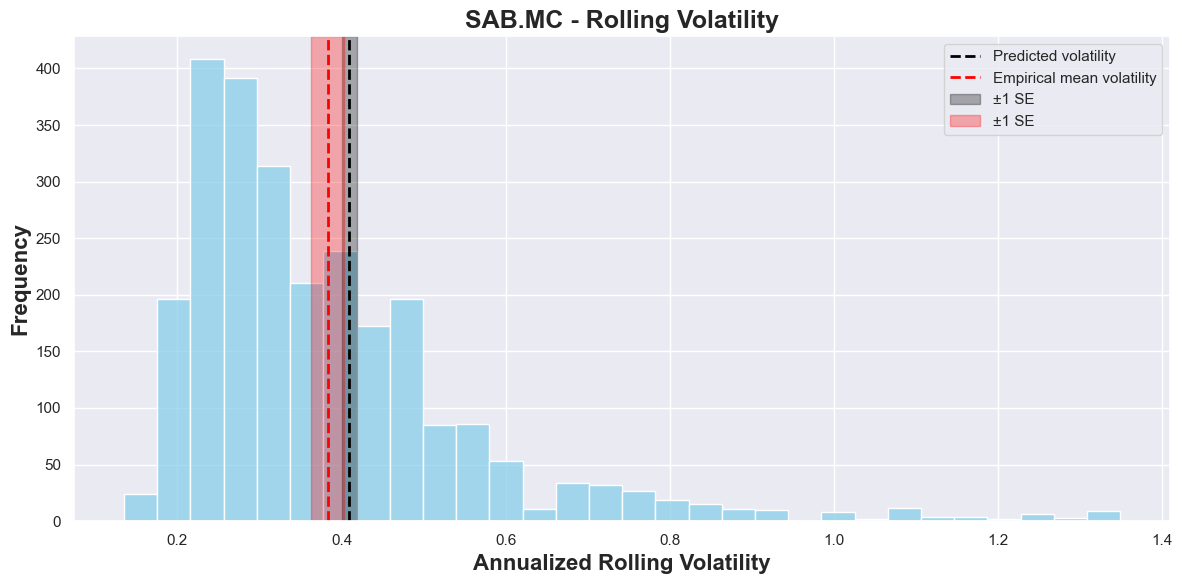

Empirical volatility: 0.3830 ± 0.0202 (SE with autocorr)
Effective sample size: 61.0 (out of 2584)


In [15]:
def estimate_se_binning(vol_series, bin_size):
    n = len(vol_series)
    n_bins = n // bin_size
    # Truncate to full bins
    trimmed = vol_series[:n_bins * bin_size]
    bins = trimmed.values.reshape(n_bins, bin_size)
    bin_means = bins.mean(axis=1)
    se = bin_means.std(ddof=1) / np.sqrt(n_bins)
    return se, n_bins


def Rolling_Vol_hist(data, results, asset_name):
    sns.set(style="darkgrid")

    rolling_vol = data[f"Close_{asset_name}"].rolling(window=21).std().dropna() * np.sqrt(252)
    n = len(rolling_vol)

    mean_vol = rolling_vol.mean()

    se, n_eff = estimate_se_binning(rolling_vol, bin_size=21*2)

    fit_params = results[results['Asset'] == asset_name].iloc[0]
    loc = fit_params['loc']
    scale = fit_params['scale']
    pred_vol = np.sqrt(2) * scale * np.sqrt(252)
    se_t = np.sqrt(2*252) * fit_params['se_scale']
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    sns.histplot(rolling_vol, kde=False, ax=ax1, color='skyblue', bins=30)

    ax1.axvline(x=pred_vol, color='black', linestyle='--', linewidth=2, label='Predicted volatility')
    ax1.axvline(x=mean_vol, color='red', linestyle='--', linewidth=2, label='Empirical mean volatility')
    
    ax1.axvspan(pred_vol - se_t, pred_vol + se_t, color='black', alpha=0.3, label='±1 SE')
    ax1.axvspan(mean_vol - se, mean_vol + se, color='red', alpha=0.3, label='±1 SE')

    ax1.set_xlabel("Annualized Rolling Volatility", fontsize=16, fontweight='bold')
    ax1.set_ylabel("Frequency", fontsize=16, fontweight='bold')
    ax1.set_title(asset_name + " - Rolling Volatility", fontsize=18, fontweight='bold')
    ax1.legend()
    plt.tight_layout()
    plt.show()

    print(f"Empirical volatility: {mean_vol:.4f} ± {se:.4f} (SE with autocorr)")
    print(f"Effective sample size: {n_eff:.1f} (out of {n})")

Rolling_Vol_hist(returns, results, "SAB.MC")

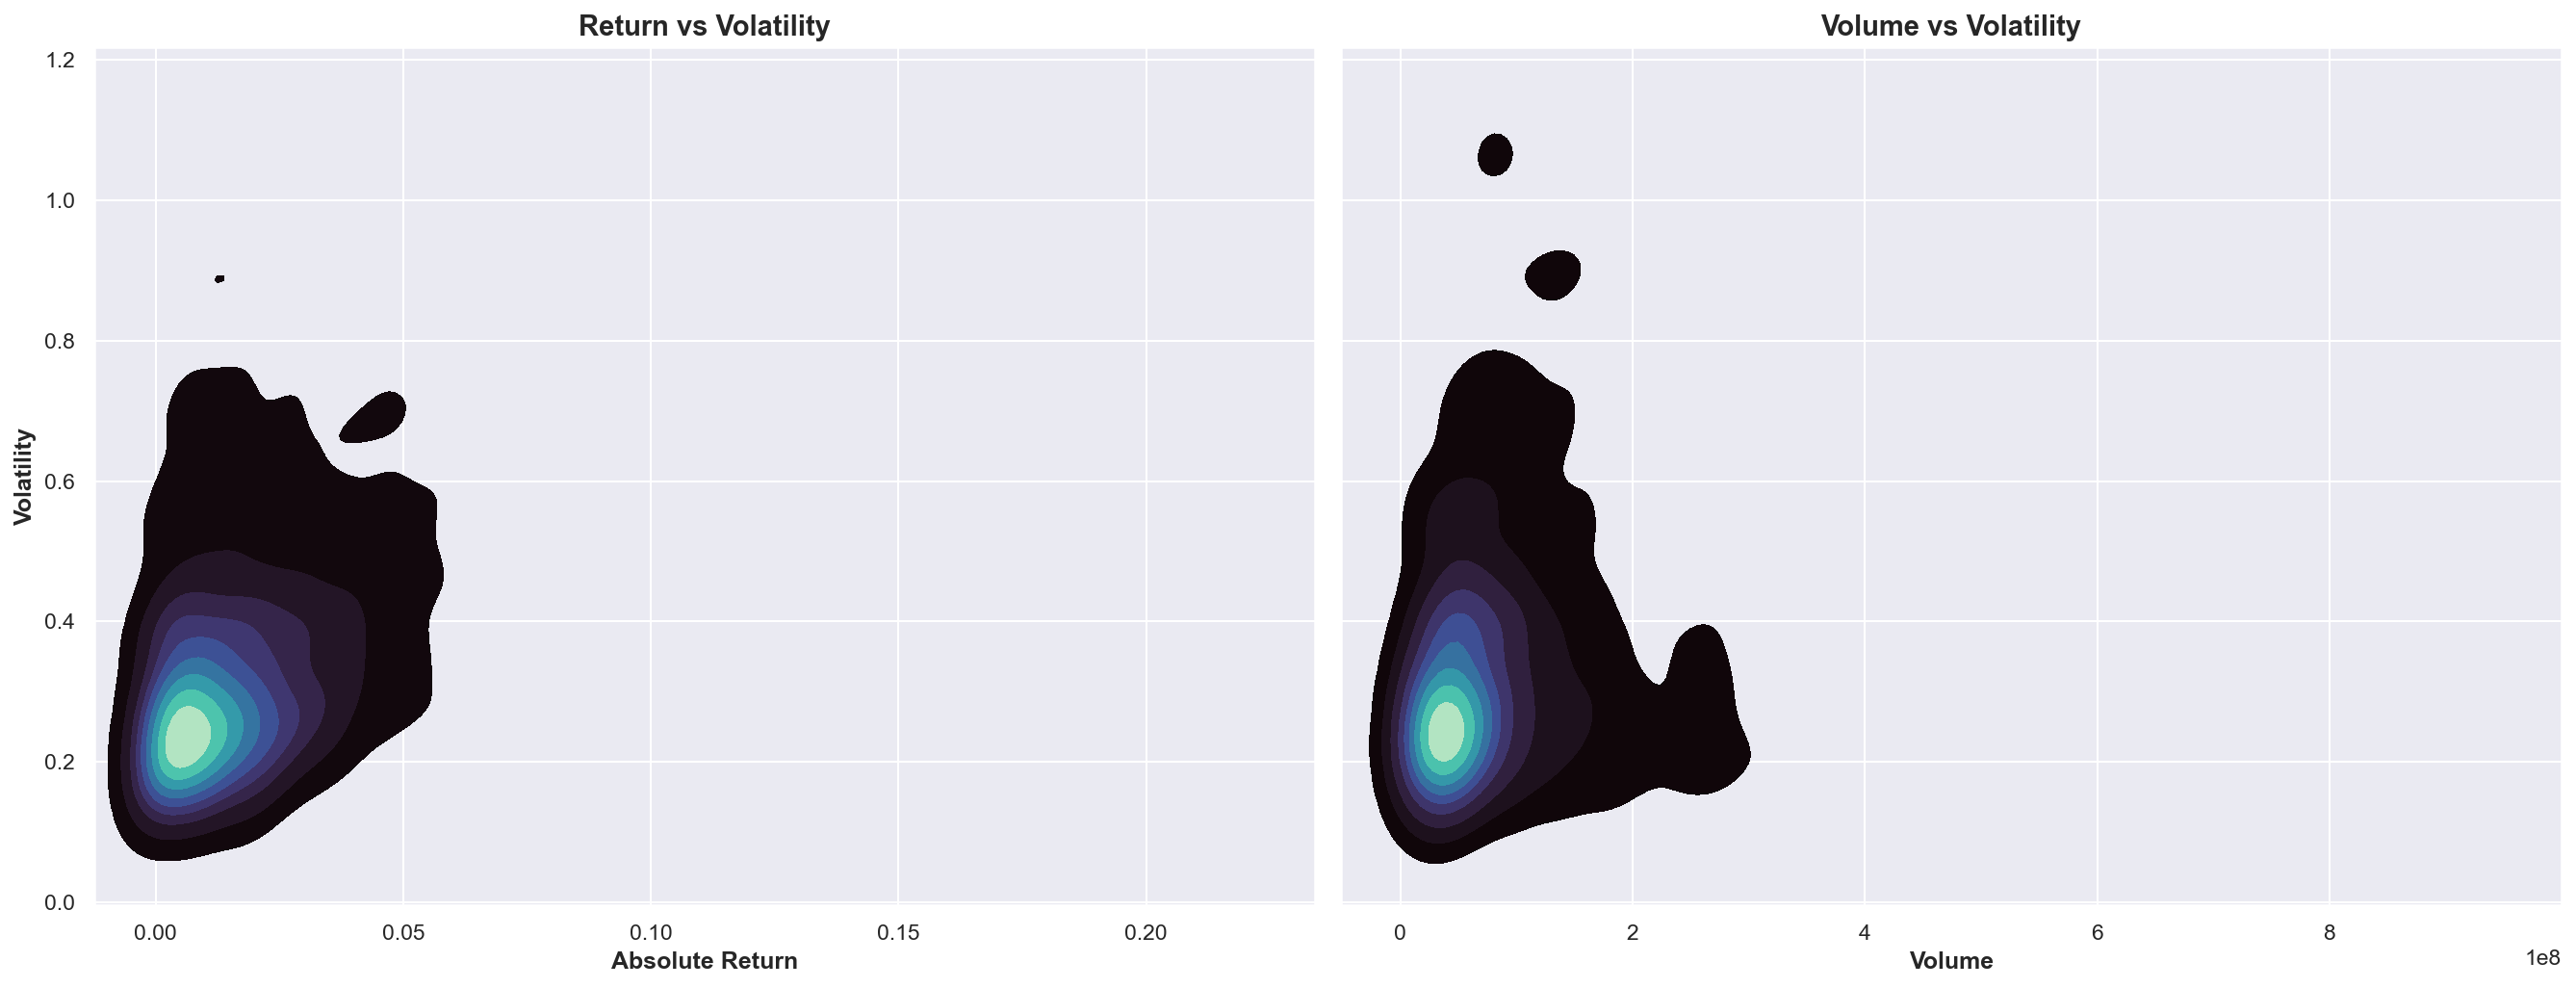

Correlación con volumen:
   Pearson:  0.167
   Spearman: 0.247

 Correlación con retorno (absoluto):
   Pearson:  0.392
   Spearman: 0.334


In [12]:
rolling_vol = returns["Close_SAN.MC"].rolling(window=21).std() * np.sqrt(252)
vol_data = rolling_vol.dropna()

return_data = returns["Close_SAN.MC"].loc[vol_data.index].abs()
volume_data = data["Volume_SAN.MC"].loc[vol_data.index]

fig, axes = plt.subplots(1, 2, figsize=(18, 7), dpi=150, sharey=True)

sns.kdeplot(x=return_data, y=vol_data, fill=True, cmap="mako", ax=axes[0])
axes[0].set_title("Return vs Volatility", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Absolute Return", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Volatility", fontsize=12, fontweight='bold')

sns.kdeplot(x=volume_data, y=vol_data, fill=True, cmap="mako", ax=axes[1])
axes[1].set_title("Volume vs Volatility", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Volume", fontsize=12, fontweight='bold')
axes[1].set_ylabel("", fontsize=12)

plt.tight_layout()
plt.show()


print("Correlación con volumen:")
print(f"   Pearson:  {volume_data.corr(vol_data, method='pearson'):.3f}")
print(f"   Spearman: {volume_data.corr(vol_data, method='spearman'):.3f}")

print("\n Correlación con retorno (absoluto):")
print(f"   Pearson:  {return_data.corr(vol_data, method='pearson'):.3f}")
print(f"   Spearman: {return_data.corr(vol_data, method='spearman'):.3f}")

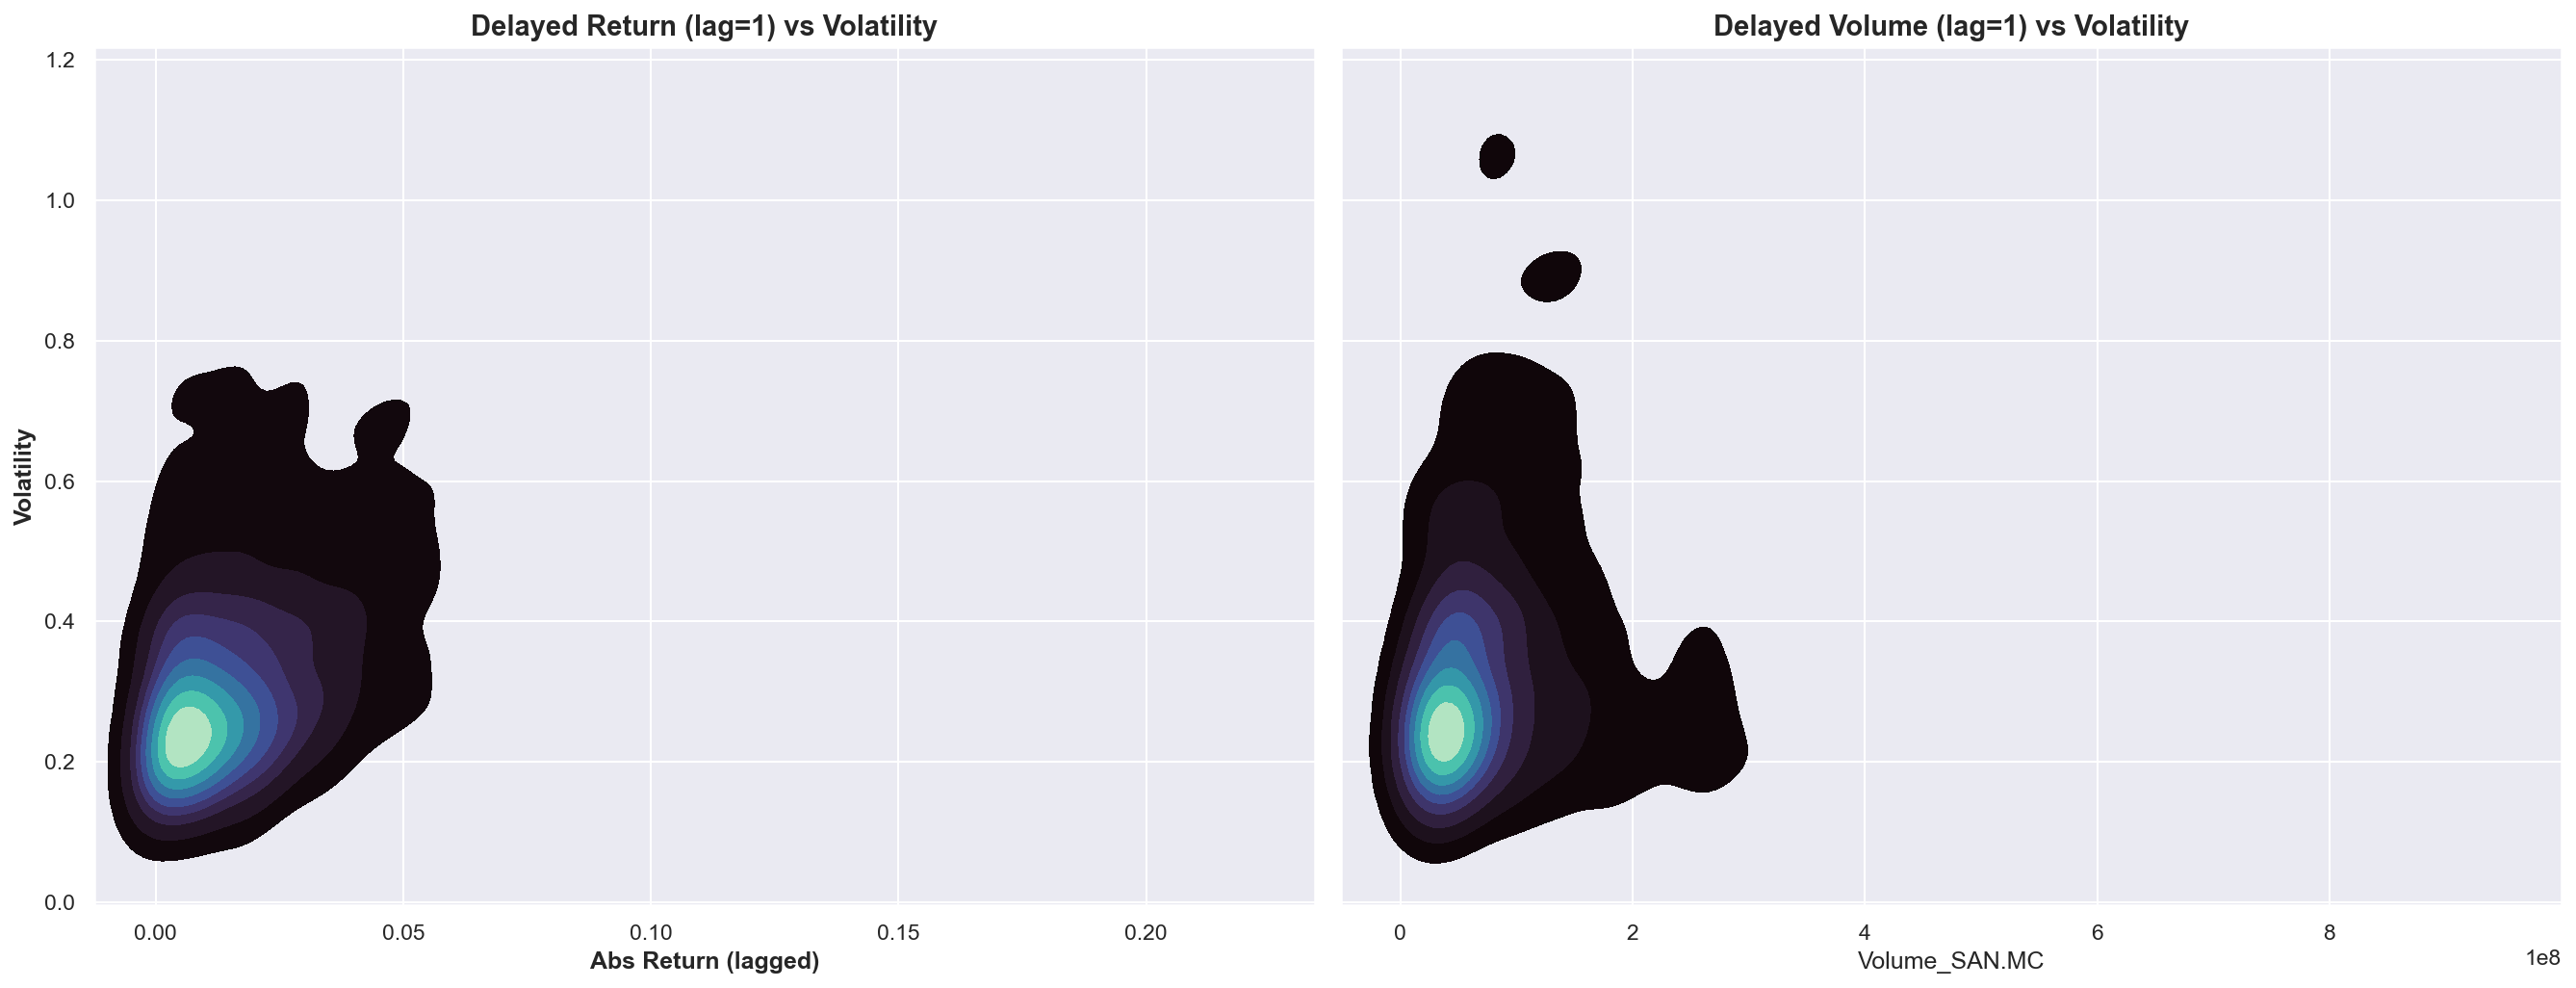

In [13]:
def delayed_corr_plot(asset="SAN.MC", lag=1, window=21):
    asset_close = f"Close_{asset}"
    asset_volume = f"Volume_{asset}"

    rolling_vol = returns[asset_close].rolling(window=window).std() * np.sqrt(252)
    vol_data = rolling_vol.dropna()

    
    return_data = returns[asset_close].abs().shift(lag).loc[vol_data.index]

    volume_data = data[asset_volume].shift(lag).loc[vol_data.index]

    fig, axes = plt.subplots(1, 2, figsize=(18, 7), dpi=150, sharey=True)

    sns.kdeplot(x=return_data, y=vol_data, fill=True, cmap="mako", ax=axes[0])
    axes[0].set_title(f"Delayed Return (lag={lag}) vs Volatility", fontsize=14, fontweight='bold')
    axes[0].set_xlabel("Abs Return (lagged)", fontsize=12, fontweight='bold')
    axes[0].set_ylabel("Volatility", fontsize=12, fontweight='bold')

    sns.kdeplot(x=volume_data, y=vol_data, fill=True, cmap="mako", ax=axes[1])
    axes[1].set_title(f"Delayed Volume (lag={lag}) vs Volatility", fontsize=14, fontweight='bold')
    axes[1].set_ylabel("")

    plt.tight_layout()
    plt.show()

delayed_corr_plot(asset="SAN.MC", lag=1) 